<a href="https://colab.research.google.com/github/sharmamuskaan/Healthgenics/blob/master/Vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Part 1 - Notebook Setup and Authentication**

**Import dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import time
from datetime import datetime, date, timedelta
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm
from gensim.models.doc2vec import LabeledSentence
import gensim
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings("ignore")


In [ ]:
# For Twitter API extraction
import tweepy

In [ ]:
# Tweet pre-processor
!pip install tweet-preprocessor

In [ ]:
# Tweet pre-processor
import preprocessor as p

In [ ]:
# NLTK
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# TextBlob
from textblob import TextBlob

In [ ]:
import copy

In [ ]:
!pip install stanza

In [ ]:
# Stanza
import stanza
stanza.download('en')

2021-05-19 11:32:40 INFO: Downloading default packages for language: en (English)...
2021-05-19 11:32:41 INFO: File exists: /root/stanza_resources/en/default.zip.
2021-05-19 11:32:46 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
import csv

In [ ]:
!pip install stylecloud

In [ ]:
import stylecloud
from PIL import Image

**Twitter API credentials setup**

In [ ]:
# api_key = 'BipQLD1z5El5nlhxVadzAhaIc'
# api_key_secret = 'akvTqwycGHxYUFamuag0gyEk7NNd76wvFaOkRd7yQPgY6rnFfK'
# access_token = '1153586050775695366-3LEWVpS27PyqvUlpJDW4FYCWnlVJfc'
# access_token_secret = 'wFR6yU7nTq2FVIHCKzmLiZtP33v3BIM80QMRZRRkdx8ov'

# auth = tweepy.OAuthHandler(api_key, api_key_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth)


**Part 2 - Data Extraction with Twitter API and Text Pre-Processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')
# filename = 'covid_vaccine_tweets_extracted_' + extract_datetime
#tweets_df.drop_duplicates(inplace = True)

In [ ]:
# tweets_df.to_csv('/content/drive/MyDrive/TE Project/data.xls')

In [ ]:
working_dir_path = '/content/drive/MyDrive/TE Project/vaccination.csv'
tweets_df = pd.read_csv(working_dir_path,encoding = 'latin')

In [ ]:
tweets_df = tweets_df.drop_duplicates('text')
print(tweets_df.shape)

(69621, 6)


In [ ]:
tweets_df.head()

,username,location,verified,tweet_date,text,hashtags
0,Rachel Roh,"La Crescenta-Montrose, CA",False,20-12-2020 06:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech']
1,Albert Fong,"San Francisco, CA",False,13-12-2020 16:27,While the world has been on the wrong side of ...,NaN
2,eli???ñ???????¦???§????,Your Bed,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf..."
3,Charles Adler,"Vancouver, BC - Canada",True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're...",NaN
4,Citizen News Channel,NaN,False,12-12-2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']"


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69621 entries, 0 to 69717
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    69621 non-null  object
 1   location    53832 non-null  object
 2   verified    69621 non-null  bool  
 3   tweet_date  69621 non-null  object
 4   text        69621 non-null  object
 5   hashtags    54807 non-null  object
dtypes: bool(1), object(5)
memory usage: 3.3+ MB


In [ ]:
tweets_df.tweet_date.value_counts()

12-04-2021 09:58    17
12-04-2021 10:07    17
12-04-2021 09:55    16
12-04-2021 10:12    15
03-03-2021 16:39    15
                    ..
31-03-2021 06:10     1
25-02-2021 13:40     1
25-02-2021 07:19     1
16-03-2021 18:19     1
23-03-2021 22:33     1
Name: tweet_date, Length: 48252, dtype: int64

In [ ]:
def get_hashtags(text):
    list_of_hashtags = []
    temp = text.split()
    for word in temp:
        if word[0] == '#':
            list_of_hashtags.append(word)
    return list_of_hashtags

In [ ]:
texts = list(tweets_df['text'])
tweets_df['hashtags'] = [get_hashtags(text) for text in texts]

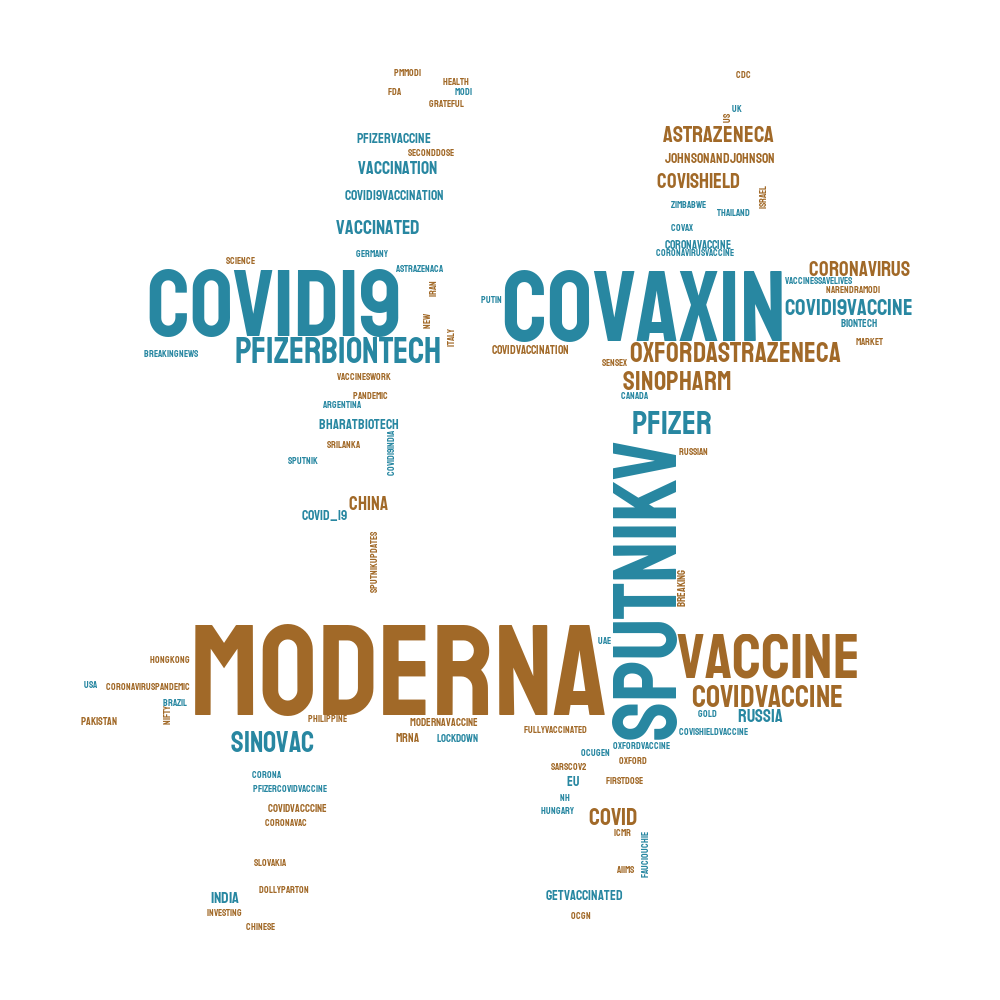

In [ ]:
#Overall hashtags for all months
tweets_df['hashtags_extracted'] = tweets_df['hashtags'].apply(lambda x: ' '.join(x))
long_string = ','.join(list(tweets_df['hashtags_extracted'].values))
stylecloud.gen_stylecloud(text=long_string, icon_name='fas fa-hashtag', max_words=100, palette='cartocolors.diverging.Earth_2', output_name='hashtags.png', size = 1000, collocations=False)
Image.open('hashtags.png')
#tweets_df['hashtags_texts'].values
#long_string

In [ ]:
# # Generate list of dates (7 days window) based on today's date
# list_of_dates = []
# today = date.today()
# for i in range(-7,1):
#     target_date = (today + timedelta(days=i)).strftime("%Y-%m-%d")
#     list_of_dates.append(target_date)
# list_of_dates


In [ ]:
# list_of_dicts = []
# search_term = 'covid covid19 vaccine COVIDvaccine'
# num_tweets = 10000

In [ ]:
# def get_tweets(search_term = search_term, num_tweets = num_tweets):
    
#     for end_date in list_of_dates:
#         start_date = (datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=1)).strftime("%Y-%m-%d") # Create 1-day windows for extraction
#         tweet_count = len(list_of_dicts)

#         for tweet in tweepy.Cursor(api.search,
#                                    q=f'{search_term} since:{start_date} until:{end_date}',
#                                    lang = 'en',
#                                    count = num_tweets,
#                                    tweet_mode = 'extended').items(num_tweets):
#             if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
#                 if tweet.lang == "en":
#                     tweet_dict = {}
#                     tweet_dict['username'] = tweet.user.name
#                     tweet_dict['location'] = tweet.user.location
#                     tweet_dict['text'] = tweet.full_text
#                     tweet_dict['verified'] = tweet.verified
#                     tweet_dict['hashtags'] = tweet.entities['hashtags']
#                     tweet_dict['tweet_date'] = tweet.created_at
#                     list_of_dicts.append(tweet_dict)
#                     tweet_count +=1
#                     print(f'Extracted tweet count = {tweet_count}')
                
#         print(f'Completed extraction for {start_date} to {end_date}. Sleep for 15 mins')
#         time.sleep(600)
#         print('Ready to go again')

In [ ]:
#  # Run tweet extraction function
# get_tweets()

In [ ]:
# # Number of tweets pulled
# len(list_of_dicts)

In [ ]:
# we do not care about the exact time of each tweet, we just want the date
tweets_df['tweet_date'] = pd.to_datetime(tweets_df['tweet_date']).dt.date
tweets_df.head()

,username,location,verified,tweet_date,text,hashtags,hashtags_extracted
0,Rachel Roh,"La Crescenta-Montrose, CA",False,2020-12-20,Same folks said daikon paste could treat a cyt...,[#PfizerBioNTech],#PfizerBioNTech
1,Albert Fong,"San Francisco, CA",False,2020-12-13,While the world has been on the wrong side of ...,[],
2,eli???ñ???????¦???§????,Your Bed,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,Charles Adler,"Vancouver, BC - Canada",True,2020-12-12,"Facts are immutable, Senator, even when you're...",[],
4,Citizen News Channel,NaN,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"[#whereareallthesickpeople, #PfizerBioNTech??]",#whereareallthesickpeople #PfizerBioNTech??


In [ ]:
# create a copy of the dataframe
#df_time = tweets_df.copy()
df_time = copy.deepcopy(tweets_df)

# set the timestamp column as the index and delete the column
df_time.index = df_time['tweet_date']
del df_time['tweet_date']

df_time.head()

,username,location,verified,text,hashtags,hashtags_extracted
tweet_date,,,,,,
2020-12-20,Rachel Roh,"La Crescenta-Montrose, CA",False,Same folks said daikon paste could treat a cyt...,[#PfizerBioNTech],#PfizerBioNTech
2020-12-13,Albert Fong,"San Francisco, CA",False,While the world has been on the wrong side of ...,[],
2020-12-12,eli???ñ???????¦???§????,Your Bed,False,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",#coronavirus #SputnikV #AstraZeneca #PfizerBio...
2020-12-12,Charles Adler,"Vancouver, BC - Canada",True,"Facts are immutable, Senator, even when you're...",[],
2020-12-12,Citizen News Channel,NaN,False,Explain to me again why we need a vaccine @Bor...,"[#whereareallthesickpeople, #PfizerBioNTech??]",#whereareallthesickpeople #PfizerBioNTech??


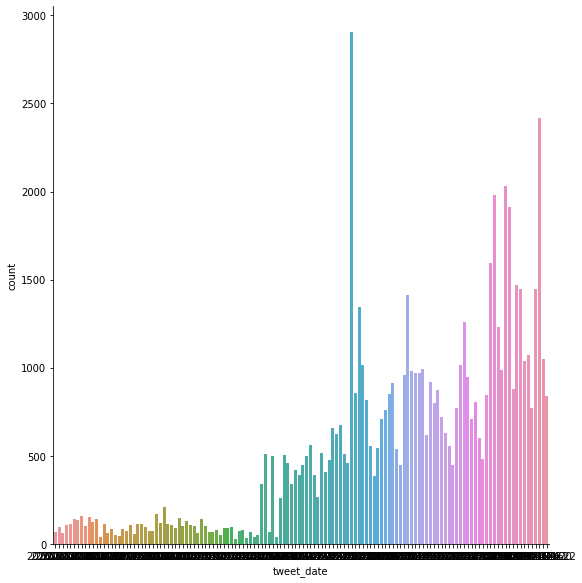

In [ ]:
sns.catplot("tweet_date", data=tweets_df, kind="count", height=8)

### **Reviewing Our Dataset**


In [ ]:
tweets_df

,username,location,verified,tweet_date,text,hashtags,hashtags_extracted,Month
0,Rachel Roh,"La Crescenta-Montrose, CA",False,2020-12-20,Same folks said daikon paste could treat a cyt...,[#PfizerBioNTech],#PfizerBioNTech,12
1,Albert Fong,"San Francisco, CA",False,2020-12-13,While the world has been on the wrong side of ...,[],,12
2,eli???ñ???????¦???§????,Your Bed,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",#coronavirus #SputnikV #AstraZeneca #PfizerBio...,12
3,Charles Adler,"Vancouver, BC - Canada",True,2020-12-12,"Facts are immutable, Senator, even when you're...",[],,12
4,Citizen News Channel,NaN,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"[#whereareallthesickpeople, #PfizerBioNTech??]",#whereareallthesickpeople #PfizerBioNTech??,12
...,...,...,...,...,...,...,...,...
69713,Russian Mission in Geneva,Geneve,True,2021-04-14,?? ???ú???§#Gamaleya Research Center in coope...,[],,4
69714,Mora Mosese,NtswanaTsatsi,False,2021-04-14,@FloydShivambu #SputnikV. Where are #AfricanEx...,"[#SputnikV., #AfricanExpertise, #ShamDemic]",#SputnikV. #AfricanExpertise #ShamDemic,4
69715,Robert ka Boss,NaN,False,2021-04-14,"Hello, it s because of this stubbornness and f...",[],,4
69716,Mick Brown,"Cambridge, UK",False,2021-04-14,In a lengthy interview on #wato some months ag...,"[#wato, #SputnikV]",#wato #SputnikV,4


In [ ]:
tweets_df['location'].value_counts()


India                             2289
Toronto, Canada  and Worldwide    2080
New Delhi, India                   914
United States                      721
Mumbai, India                      586
                                  ... 
Tampa,FL to Delft, NL                1
bikaner rajasthan                    1
Behind the "Offensive Replies"       1
New Delhi, India (Bharat)            1
Lawrenceville, GA                    1
Name: location, Length: 12748, dtype: int64

### **Verified And Non-Verified Users**

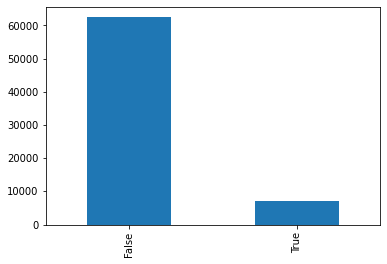

In [ ]:
tweets_df['verified'].value_counts().head(n=10).plot.bar()

###**Heat Map for missing values**

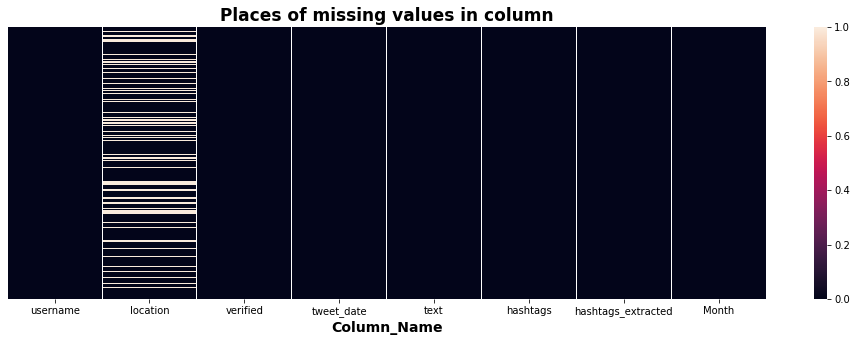

In [ ]:
plt.figure(figsize=(17, 5))
sns.heatmap(tweets_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go

### **Top 10 locations of tweet**

In [ ]:
Top_Location_Of_tweet= tweets_df['location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [ ]:
Top_Location_Of_tweet.head(10)

India                             2289
Toronto, Canada  and Worldwide    2080
New Delhi, India                   914
United States                      721
Mumbai, India                      586
London, England                    546
Beijing, China                     485
New Delhi                          401
Beijing                            389
London                             382
Name: location, dtype: int64

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

,Location,location
0,India,2289
1,"Toronto, Canada and Worldwide",2080
2,"New Delhi, India",914
3,United States,721
4,"Mumbai, India",586
5,"London, England",546
6,"Beijing, China",485
7,New Delhi,401
8,Beijing,389
9,London,382


[Text(0, 0, 'India'),
 Text(0, 0, 'Toronto, Canada  and Worldwide'),
 Text(0, 0, 'New Delhi, India'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'Mumbai, India'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'Beijing, China'),
 Text(0, 0, 'New Delhi'),
 Text(0, 0, 'Beijing'),
 Text(0, 0, 'London')]

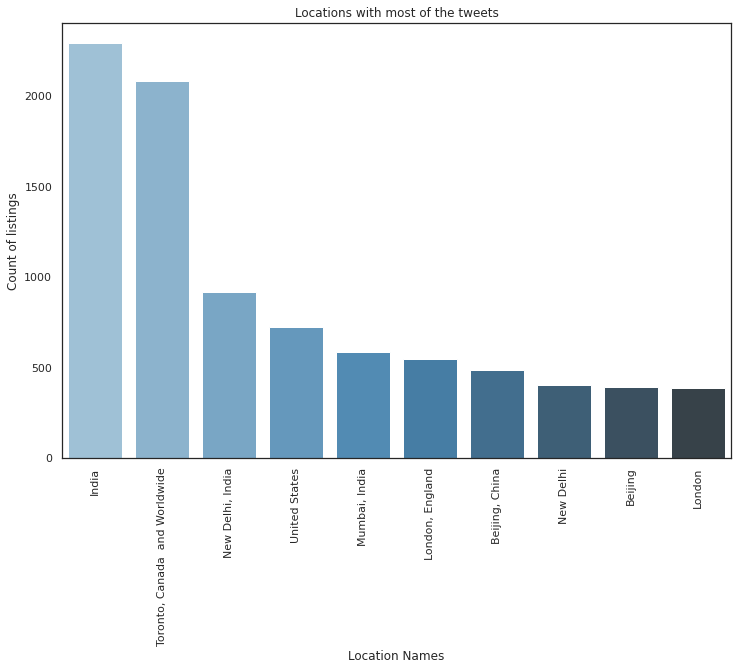

In [ ]:
viz_1=sns.barplot(x="Location", y="location", data=Top_Location_Of_tweet_df, palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=90)

In [ ]:
#Keep only tweets that involve the vaccine
tweets_df_final = tweets_df[(tweets_df['text'].str.contains("vacc")) 
                            | (tweets_df['text'].str.contains("Vacc"))]
#len(tweets_df_final)
tweets_df_final

,username,location,verified,tweet_date,text,hashtags,hashtags_extracted,Month
1,Albert Fong,"San Francisco, CA",False,2020-12-13,While the world has been on the wrong side of ...,[],,12
2,eli???ñ???????¦???§????,Your Bed,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",#coronavirus #SputnikV #AstraZeneca #PfizerBio...,12
4,Citizen News Channel,NaN,False,2020-12-12,Explain to me again why we need a vaccine @Bor...,"[#whereareallthesickpeople, #PfizerBioNTech??]",#whereareallthesickpeople #PfizerBioNTech??,12
5,Dee,"Birmingham, England",False,2020-12-12,Does anyone have any useful advice/guidance fo...,[],,12
6,Gunther Fehlinger,"Austria, Ukraine and Kosovo",False,2020-12-12,it is a bit sad to claim the fame for success ...,[#vaccination],#vaccination,12
...,...,...,...,...,...,...,...,...
69706,Shashank Shekhar Jha,"?? ?¨ ?ý  ?ý ?, ?? ?? ?ø ??",False,2021-04-14,#SputnikV got clearance by DCGI.\n\nThird vacc...,"[#SputnikV, #ChineseVirus.]",#SputnikV #ChineseVirus.,4
69707,Roopam,Ranchi,False,2021-04-14,Mr. @RahulGandhi it is not because of you but ...,[#SputnikV],#SputnikV,4
69708,Russian Embassy in Kenya/????¥???¯¥?¥¥??ý?? ...,"??ø??¥????ñ??, ???æ?«??¥",False,2021-04-14,????General information on #SputnikV and clari...,[#SputnikV],#SputnikV,4
69709,Emil Stenberg,NaN,False,2021-04-14,The EU will end the contracts of all viral vec...,[],,4


In [ ]:
tweets_df_final.loc[1,"text"]

"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev\x83?? https://t.co/dlCHrZjkhm"

In [ ]:

# Create timestamp for datetime of extraction
# extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')

# # Create csv filename
# filename = 'covid_vaccine_tweets_extracted_' + extract_datetime + '.csv'

# Drop duplicates (if any)
#tweets_df_final.drop_duplicates(inplace = True)

# Export dataframe as csv file with above filename
#tweets_df_final.to_csv(filename, index = False)

In [ ]:
# tweets_df_final


#Text Pre-processing

Using tweet-preprocessor Python package (https://pypi.org/project/tweet-preprocessor/)
pip install tweet-preprocessor

Preprocessor is a preprocessing library for tweet data written in Python. Currently supports cleaning, tokenizing and parsing: URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys

In [ ]:
tweets_df = tweets_df_final.copy()

In [ ]:
#Clean tweet text with tweet-preprocessor
tweets_df['text_cleaned'] = tweets_df['text'].apply(lambda x: p.clean(x))

In [ ]:
#Remove duplicate tweets
tweets_df.drop_duplicates(subset='text_cleaned', keep="first", inplace = True)
len(tweets_df)

37284

In [ ]:
#Remove unnecessary characters
#Note: Need to remove % as Stanford CoreNLP annotation encounters error if text contains some of these characters
punct =['%','/',':','\\','&amp;','&',';', '?']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

tweets_df['text_cleaned'] = tweets_df['text_cleaned'].apply(lambda x: remove_punctuations(x))

In [ ]:
#Drop tweets which have empty text field
tweets_df['text_cleaned'].replace('', np.nan, inplace=True)
tweets_df['text_cleaned'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['text_cleaned'], inplace=True)
len(tweets_df)

37279

In [ ]:
#Drop tweets which have empty location field
tweets_df['location'].replace('', np.nan, inplace=True)
tweets_df['location'].replace(' ', np.nan, inplace=True)
tweets_df.dropna(subset=['location'], inplace=True)
len(tweets_df)

29126

In [ ]:
tweets_df = tweets_df.reset_index(drop=True)
tweets_df.sample(5)

,username,location,verified,tweet_date,text,hashtags,hashtags_extracted,Month,text_cleaned
23013,sabrina rosen,"los angeles, ca usa",False,2021-04-13,2nd shot done. Vaccinated. #worthit #freedom #...,"[#worthit, #freedom, #get, #moderna]",#worthit #freedom #get #moderna,4,nd shot done. Vaccinated. vaccinated
15353,Tina M Kenney ???? ???§????,"Denver, CO",False,2021-03-20,"Got my first ""Dr. Fauci Ouchie"" today. #CovidV...","[#CovidVaccine, #Moderna]",#CovidVaccine #Moderna,3,"Got my first ""Dr. Fauci Ouchie"" today."
27100,NOVA ScriptsCentral,Falls Church VA,False,2021-04-19,This Thursday we do round 2 of our #Moderna va...,[#Moderna],#Moderna,4,This Thursday we do round of our vaccine drive...
494,Englewood Health,"Englewood, NJ",False,2020-12-18,"In a historic event, #EnglewoodHealth has rece...","[#EnglewoodHealth, #PfizerBioNTech, #COVID19, ...",#EnglewoodHealth #PfizerBioNTech #COVID19 #vac...,12,"In a historic event, has received its first sh..."
24195,?ú ?ñ ? ?? ?? ? ?ñ ????? ??`?? #Destro...,"Mumbai, India",False,2021-11-04,India enroute to approve EUA for #SputnikV vac...,[#SputnikV],#SputnikV,11,India enroute to approve EUA for vaccine in ab...


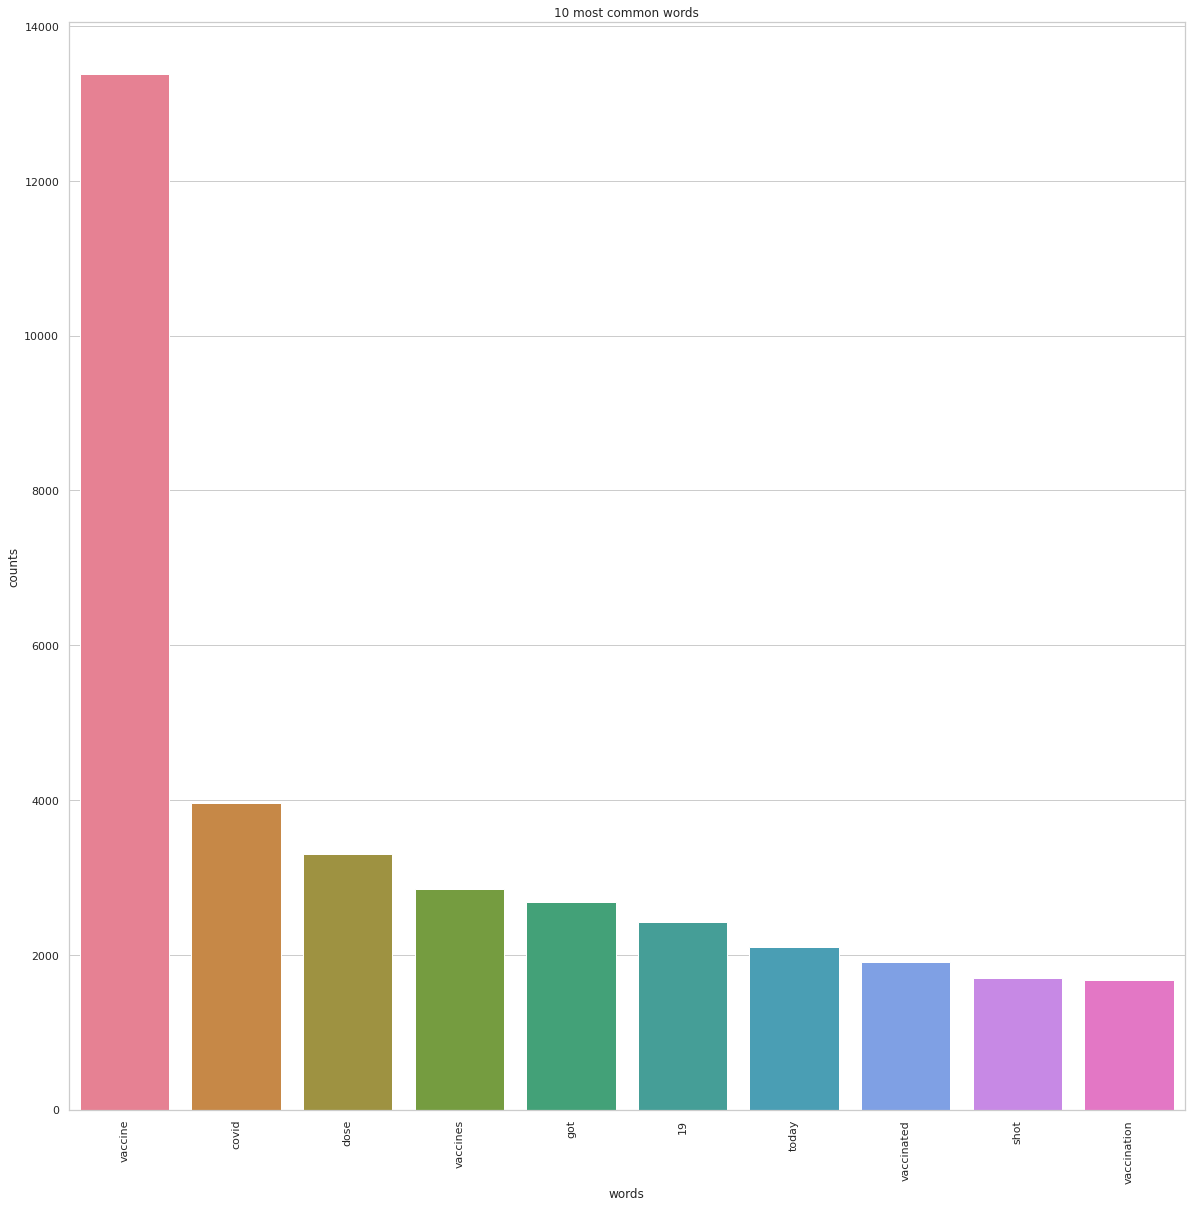

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(20, 20))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets_df['text_cleaned'])# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)
plt.savefig('saved_figure.png')

### **Bigrams**

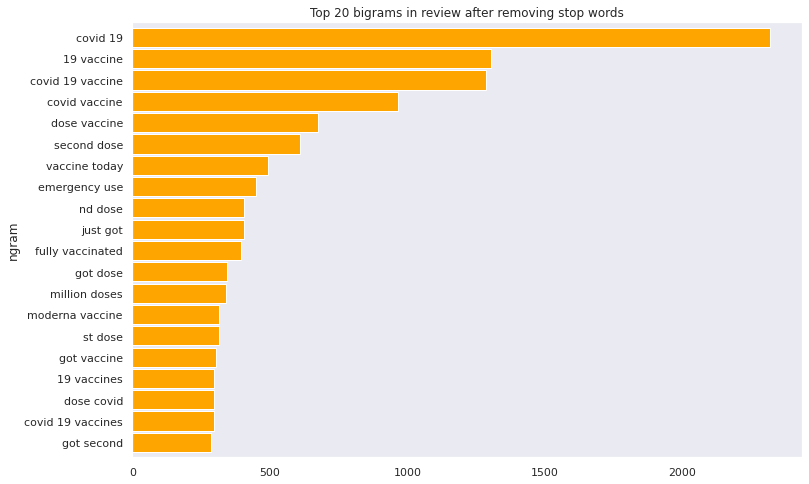

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 4), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(tweets_df['text_cleaned'], 20)
mydict={}
for word, freq in common_words:
    bigram_df  = pd.DataFrame(common_words, columns = ['ngram' , 'count'])
bigram_df.groupby('ngram').sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title='Top 20 bigrams in review after removing stop words', color='orange', width=.9, figsize=(12, 8), stacked = True)

#iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# extract_datetime = datetime.today().strftime('%Y%m%d_%H%M%S')
# filename = 'covid_vaccine_tweets_extracted_' + extract_datetime
# tweets_df.drop_duplicates(inplace = True)

In [ ]:
# tweets_df.to_csv('/drive/My Drive/TE Project/data.csv')

#Part 3 - Sentiment Analysis

In [ ]:
# Define function to get value counts
def get_value_counts(col_name, analyzer_name):
    count = pd.DataFrame(tweets_df[col_name].value_counts())
    percentage = pd.DataFrame(tweets_df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df


####Part 3A - Sentiment Analysis with NLTK Vader
Natural Learning Toolkit (NLTK) is a Python package that offers programs supporting natural language processing (NLP). We are using the Valence Aware Dictionary and sEntiment Reasoner (VADER) model, which is a lexicon and rule-based sentiment analysis tool specifically aimed at sentiment analysis of social media text. It uses a bag of words approach with simple heuristics (such as increasing sentiment intensity in presence of certain words like "very" or "really").

In [ ]:
pip install nltk

In [ ]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
tweets_df['nltk_scores'] = tweets_df['text_cleaned'].apply(lambda x: sia.polarity_scores(x))

# Obtaining NLTK compound score
tweets_df['nltk_cmp_score'] = tweets_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
neutral_thresh = 0.05

In [ ]:
# Categorize scores into the sentiments of positive, neutral or negative
tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
# tweets_df['nltk_sentiment'] = tweets_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [ ]:
tweets_df['nltk_cmp_score'].describe()


count    29126.000000
mean         0.115747
std          0.344413
min         -0.959900
25%          0.000000
50%          0.000000
75%          0.401900
max          0.968200
Name: nltk_cmp_score, dtype: float64

In [ ]:
nltk_df = tweets_df[['text_cleaned', 'nltk_sentiment', 'location']]
nltk_df

,text_cleaned,nltk_sentiment,location
0,While the world has been on the wrong side of ...,Negative,"San Francisco, CA"
1,Russian vaccine is created to last -4 years,Positive,Your Bed
2,Does anyone have any useful adviceguidance for...,Positive,"Birmingham, England"
3,it is a bit sad to claim the fame for success ...,Positive,"Austria, Ukraine and Kosovo"
4,"States will start getting Monday, says",Neutral,Islamabad
...,...,...,...
29121,Russias Sputnik V vaccine to be shipped out o...,Neutral,Kenya
29122,got clearance by DCGI.Third vaccine to be avai...,Negative,"?? ?¨ ?ý  ?ý ?, ?? ?? ?ø ??"
29123,Mr. it is not because of you but that governme...,Neutral,Ranchi
29124,General information on and clarification on it...,Neutral,"??ø??¥????ñ??, ???æ?«??¥"


In [ ]:
nltk_sentiment_df = get_value_counts('nltk_sentiment','NLTK Vader')
nltk_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,4552,15.63,NLTK Vader
1,Neutral,13706,47.06,NLTK Vader
2,Positive,10868,37.31,NLTK Vader


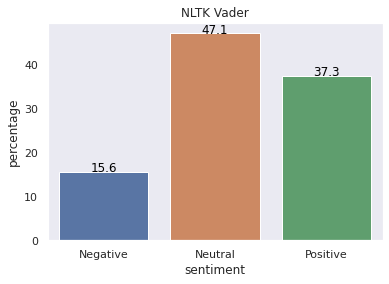

In [ ]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=nltk_sentiment_df)
ax.set_title('NLTK Vader')

for index, row in nltk_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

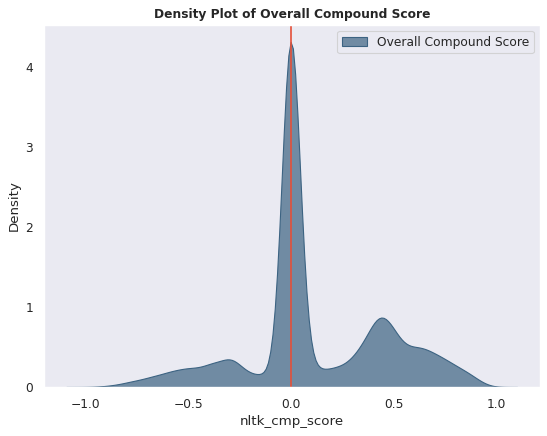

In [ ]:
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(tweets_df["nltk_cmp_score"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

#**Location Analysis**

In [ ]:
#composite_df_copy = composite_df.copy()
nltk_df['location'] = nltk_df['location'].apply(lambda x: (x.split()[-1]).strip() if x.split() else None )
nltk_df

,text_cleaned,nltk_sentiment,location
0,While the world has been on the wrong side of ...,Negative,CA
1,Russian vaccine is created to last -4 years,Positive,Bed
2,Does anyone have any useful adviceguidance for...,Positive,England
3,it is a bit sad to claim the fame for success ...,Positive,Kosovo
4,"States will start getting Monday, says",Neutral,Islamabad
...,...,...,...
29121,Russias Sputnik V vaccine to be shipped out o...,Neutral,Kenya
29122,got clearance by DCGI.Third vaccine to be avai...,Negative,??
29123,Mr. it is not because of you but that governme...,Neutral,Ranchi
29124,General information on and clarification on it...,Neutral,???æ?«??¥


In [ ]:
# AFTER MERGING LOCATIONS

top_location_of_tweet = nltk_df['location'].value_counts()
top_location_of_tweet.head(20)


India          3258
USA            1458
England         894
CA              690
States          511
China           509
UK              454
NY              418
Canada          400
TX              398
Delhi           397
Kingdom         361
Beijing         322
London          314
Pakistan        306
FL              255
Russia          219
Philippines     218
Ireland         198
Worldwide       195
Name: location, dtype: int64

In [ ]:
loc_analysis = pd.DataFrame(nltk_df['location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'location':'count'})
loc_analysis

,count
India,3258
USA,1458
England,894
CA,690
States,511
...,...
13?ø23??02.44E,1
Endor,1
Brook,1
Bnglr,1


In [ ]:
import matplotlib.pyplot as plt

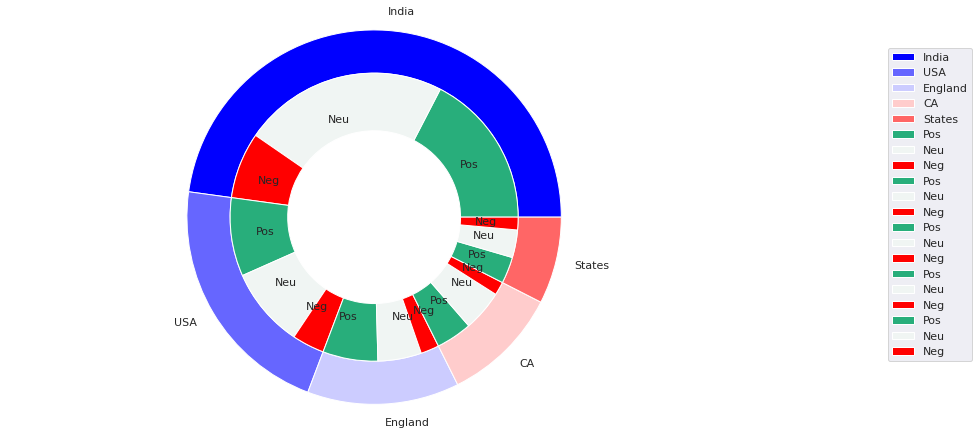

In [ ]:
group_names=loc_analysis.index[:5]
group_size=loc_analysis['count'][:5]
subgroup_names=['Positive', 'Neutral','Negative','Positive', 'Neutral','Negative','Positive', 'Neutral','Negative','Positive', 'Neutral','Negative',
                'Positive', 'Neutral','Negative']

subgroup_size=[]

composite_df = nltk_df
for city in group_names:
  # positive df 
  pos_len = len(composite_df[(composite_df.nltk_sentiment == 'Positive') & (composite_df.location == city)].axes[0])
  subgroup_size.append(pos_len)

  # neutral df
  neu_len = len(composite_df[(composite_df.nltk_sentiment == 'Neutral') & (composite_df.location == city)].axes[0])
  subgroup_size.append(neu_len)

# negative df
  neg_len = len(composite_df[(composite_df.nltk_sentiment == 'Negative') & (composite_df.location == city)].axes[0])
  subgroup_size.append(neg_len)


subgroup_new_names = ['Pos','Neu','Neg','Pos','Neu','Neg','Pos','Neu','Neg','Pos','Neu','Neg','Pos','Neu','Neg']
subgroup_colors = ['#28AE7B', '#F0F5F3', '#ff0000']


# Create colors
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('equal')
theme = plt.get_cmap('bwr')
ax.set_prop_cycle("color", [theme(1. * i / len(group_size)) for i in range(len(group_size))])
# First Ring (outside)
fig.subplots_adjust(0.02,0,1,1)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors= 
[theme(1. * i / len(group_size)) for i in range(len(group_size))] )
plt.setp( mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, 
labels=subgroup_new_names, labeldistance=0.7, colors=['#28AE7B', '#F0F5F3', '#ff0000'])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

handles, labels = ax.get_legend_handles_labels()
plt.legend(loc=(1.7, 0.1)) #-> GIVES EVERY COUNTRY KA percent.

def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.3, box.height])

total = sum(group_size)

#   CODE TO DISPLAY ONLY COUNTRIES WITH %
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % ( l, (float(s) / total) * 100) for l, s in zip(group_names, group_size)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)



# plt.legend(
#     loc='upper right',
#     labels=['%s, %1.1f%%' % ( l, (float(s) / total) * 100) for l, s in zip(subgroup_names, subgroup_size)],
#     prop={'size': 12},
#     bbox_to_anchor=(0.0, 1),
#     bbox_transform=fig.transFigure
# )

#   CODE TO DISPLAY ONLY positive -ve neutral
plt.legend(loc=(1.2, 0.1))
plt.show()


In [ ]:
# #PIE chart of tweets in India

# # positive df 
# pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & (composite_df.location == 'India')].axes[0])

# # negative df
# neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & (composite_df.location == 'India')].axes[0])

# # neutral df
# neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & (composite_df.location == 'India')].axes[0])



# # returns the number of occurences of each location.
# loc_analysis = pd.DataFrame(pos_dt['location'].value_counts().sort_values(ascending=False))
# loc_analysis = loc_analysis.rename(columns={'location':'count'})
# #loc_analysis

# #Visualizing the pie chart for top 12 countries with most positive tweets.
# # in this df, all tweets are positive only, so now we only have to find top countries in this list.

# data = {
#    "values": loc_analysis['count'][:5],
#    "labels": loc_analysis.index[:5],
#    "domain": {"column": 0},
#    "name": "Location",
#    "hoverinfo":"label+percent+name",
#    "hole": .4,
#    "type": "pie"
# }
# layout = go.Layout(title="<b>Ratio of Locations with Most Positive Tweets</b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

# data = [data]
# fig = go.Figure(data = data, layout = layout)
# fig.update_layout(title_x=0.5)
# fig.show()



####Part 3B - Sentiment Analysis with TextBlob
TextBlob is a popular Python library used to process textual data and perform a range of NLP tasks including sentiment analysis. Similar to NLTK Vader, the TextBlob sentiment classifier is also based on a bag of words approach. In fact, TextBlob is built upon the NLTK and pattern libraries.

The NaiveBayesAnalyzer is trained on movies review dataset, so we will be using the default PatternAnalyzer instead



In [ ]:
pip install textblob


In [ ]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
tweets_df['subjectivity'] = tweets_df['text'].apply(get_subjectivity)
tweets_df['polarity'] = tweets_df['text'].apply(get_polarity)
tweets_df.head()

,username,location,verified,tweet_date,text,hashtags,hashtags_extracted,Month,text_cleaned,nltk_scores,nltk_cmp_score,nltk_sentiment,subjectivity,polarity
0,Albert Fong,"San Francisco, CA",False,2020-12-13,While the world has been on the wrong side of ...,[],,12,While the world has been on the wrong side of ...,"{'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...",-0.1027,Negative,0.900000,-0.5
1,eli???ñ???????¦???§????,Your Bed,False,2020-12-12,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"[#coronavirus, #SputnikV, #AstraZeneca, #Pfize...",#coronavirus #SputnikV #AstraZeneca #PfizerBio...,12,Russian vaccine is created to last -4 years,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.2500,Positive,0.033333,0.0
2,Dee,"Birmingham, England",False,2020-12-12,Does anyone have any useful advice/guidance fo...,[],,12,Does anyone have any useful adviceguidance for...,"{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'comp...",0.7003,Positive,0.250000,0.4
3,Gunther Fehlinger,"Austria, Ukraine and Kosovo",False,2020-12-12,it is a bit sad to claim the fame for success ...,[#vaccination],#vaccination,12,it is a bit sad to claim the fame for success ...,"{'neg': 0.121, 'neu': 0.623, 'pos': 0.257, 'co...",0.5423,Positive,0.500000,-0.1
4,Ch.Amjad Ali,Islamabad,False,2020-12-12,#CovidVaccine \n\nStates will start getting #C...,"[#CovidVaccine, #COVID19Vaccine, #US, #pakustv...",#CovidVaccine #COVID19Vaccine #US #pakustv #NY...,12,"States will start getting Monday, says","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.000000,0.0


In [ ]:
# Obtain polarity scores generated by TextBlob
tweets_df['textblob_score'] = tweets_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
neutral_thresh = 0.05


In [ ]:
# Convert polarity score into sentiment categories
tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

# Neutral score = 0
#tweets_df['textblob_sentiment'] = tweets_df['textblob_score'].apply(lambda c: 'Positive' if c > 0 else ('Negative' if c < 0 else 'Neutral'))

In [ ]:
#tweets_df['textblob_score'].describe()
#tweets_df['textblob_sentiment']
textblob_df = tweets_df[['text', 'textblob_sentiment', 'location']]
textblob_df


,text,textblob_sentiment,location
0,While the world has been on the wrong side of ...,Negative,"San Francisco, CA"
1,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Neutral,Your Bed
2,Does anyone have any useful advice/guidance fo...,Positive,"Birmingham, England"
3,it is a bit sad to claim the fame for success ...,Negative,"Austria, Ukraine and Kosovo"
4,#CovidVaccine \n\nStates will start getting #C...,Neutral,Islamabad
...,...,...,...
29121,Russia??s Sputnik V vaccine ???? to be shippe...,Neutral,Kenya
29122,#SputnikV got clearance by DCGI.\n\nThird vacc...,Positive,"?? ?¨ ?ý  ?ý ?, ?? ?? ?ø ??"
29123,Mr. @RahulGandhi it is not because of you but ...,Neutral,Ranchi
29124,????General information on #SputnikV and clari...,Positive,"??ø??¥????ñ??, ???æ?«??¥"


In [ ]:
textblob_sentiment_df = get_value_counts('textblob_sentiment','TextBlob')
textblob_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,2812,9.65,TextBlob
1,Neutral,14425,49.53,TextBlob
2,Positive,11889,40.82,TextBlob


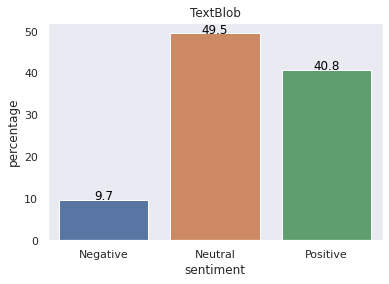

In [ ]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=textblob_sentiment_df)
ax.set_title('TextBlob')

for index, row in textblob_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")


Text(0.5, 0, 'Polarity')

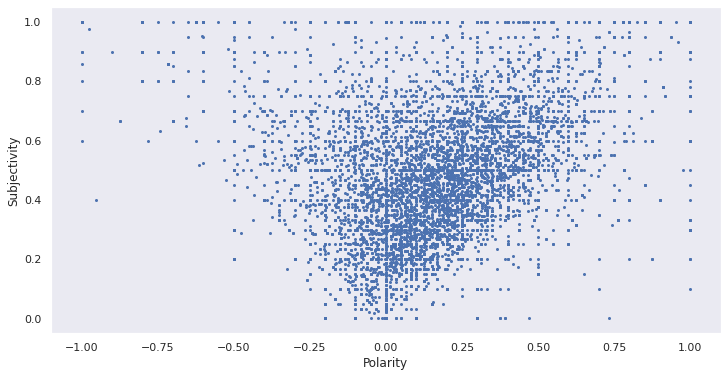

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.scatter(tweets_df['polarity'], tweets_df['subjectivity'], s=4)

plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

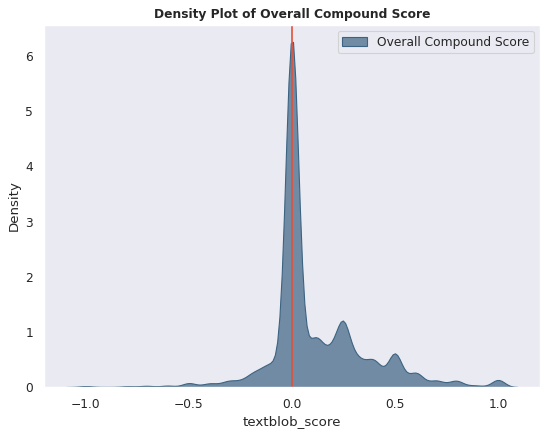

In [ ]:
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(tweets_df["textblob_score"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

####Part 3C - Sentiment Analysis with Stanza
Stanza is the default Python NLP library of the Stanford NLP Group, replacing the older Java-based CoreNLP. The modules are built on top of PyTorch, and its pre-built sentiment analyzer is trained on several datasets, including the Stanford Sentiment Treeback and Airline Twitter Sentiment.

Score mapping:
0: Negative
1: Neutral
2: Positive

In [ ]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')


2021-05-13 13:54:46 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-05-13 13:54:46 INFO: Use device: cpu
2021-05-13 13:54:46 INFO: Loading: tokenize
2021-05-13 13:54:46 INFO: Loading: sentiment
2021-05-13 13:54:47 INFO: Done loading processors!


In [ ]:
def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) # Minus 1 so as to bring score range of [0,2] to [-1,1]

In [ ]:
# Obtain sentiment categorical score generated by Stanza
tweets_df['stanza_score'] = tweets_df['text_cleaned'].apply(lambda x: stanza_analyze(x))


Streaming output truncated to the last 5000 lines.
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Pro

In [ ]:
tweets_df['stanza_score'].describe()


count    29123.000000
mean        -0.093004
std          0.601955
min         -1.000000
25%         -0.500000
50%          0.000000
75%          0.000000
max          1.000000
Name: stanza_score, dtype: float64

In [ ]:
neutral_thresh = 0.05


In [ ]:
# Convert average Stanza sentiment score into sentiment categories
tweets_df['stanza_sentiment'] = tweets_df['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
stanza_sentiment_df = get_value_counts('stanza_sentiment','Stanza')
stanza_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,9263,31.80,Stanza
1,Neutral,13744,47.19,Stanza
2,Positive,6119,21.01,Stanza


In [ ]:
stanza_df = tweets_df[['text', 'stanza_sentiment', 'location']]
stanza_df

,text,stanza_sentiment,location
0,I'm not against #CovidVaccine but I do have co...,Neutral,?ø?ÿ­
1,@DavQuinn @RTENewsAtOne In France 'all' (?) 75...,Negative,#Irlande #??ire #Ireland
2,Reminder for the vaccine event in #Miami tomo...,Neutral,"Miami, FL"
3,Anyone working on that vaccine for White men w...,Neutral,"Los Angeles, CA"
4,@justjigar @PMOIndia @narendramodi What??s th...,Neutral,"Mumbai, India"
...,...,...,...
29121,#Hungarian ???????§ Prime Minister Viktor #Orb...,Negative,"Brussels, Belgium"
29122,"128,500 U.S. Marines have been offered Covid-1...",Negative,"Texas, USA"
29123,So far Covid Vaccine Import Export share.. #va...,Negative,"My book is available on Amazon, Google books, ..."
29124,"1,400 individuals vaccinated so far ?? report...",Negative,Malta


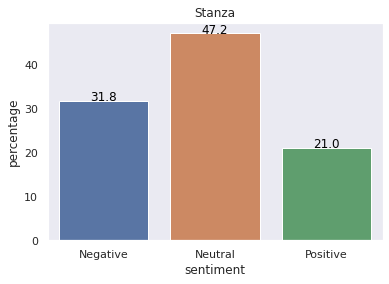

In [ ]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=stanza_sentiment_df)
ax.set_title('Stanza')

for index, row in stanza_sentiment_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")


#Part 4 - Insights from Sentiment Analyses
All the 3 libraries that we have used are:

Trained on at least 1 social media dataset
Able to give at least 3 classes of sentiments i.e. Positive, Neutral, Negative


In [ ]:
df_sentiments = pd.concat([nltk_sentiment_df, 
                           textblob_sentiment_df, 
                           stanza_sentiment_df,
                          ]).reset_index(drop=True)
df_sentiments

,sentiment,counts,percentage,analyzer
0,Negative,4552,15.63,NLTK Vader
1,Neutral,13706,47.06,NLTK Vader
2,Positive,10868,37.31,NLTK Vader
3,Negative,2812,9.65,TextBlob
4,Neutral,14425,49.53,TextBlob
5,Positive,11889,40.82,TextBlob
6,Negative,9263,31.80,Stanza
7,Neutral,13744,47.19,Stanza
8,Positive,6119,21.01,Stanza


In [ ]:
df_sentiments_pivot = df_sentiments.pivot(index='sentiment', columns='analyzer', values='percentage')
df_sentiments_pivot

analyzer,NLTK Vader,Stanza,TextBlob
sentiment,,,
Negative,15.63,31.80,9.65
Neutral,47.06,47.19,49.53
Positive,37.31,21.01,40.82


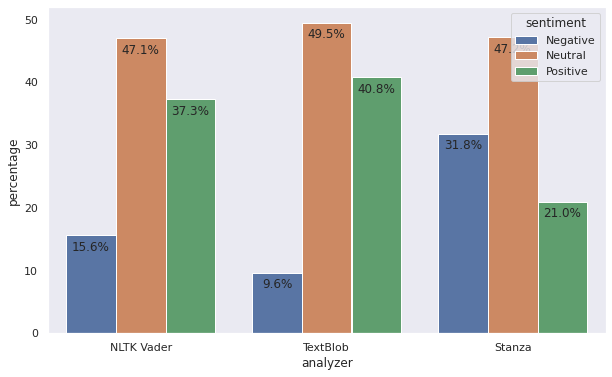

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="analyzer", y="percentage",
                 hue="sentiment", data=df_sentiments)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')


#Part 5 - Composite Sentiment with Ensemble Method

Average Score : Take average of the 3 sentiment scores of NLTK Vader, TextBlob and Stanza


In [ ]:
# Make use of sentiments from NLTK Vader, TextBlob and Stanza
tweets_df['composite_score'] =  (tweets_df['nltk_cmp_score'] 
                                + tweets_df['textblob_score']
                                + tweets_df['stanza_score'])/3

In [ ]:
tweets_df['composite_score'].describe()


count    29123.000000
mean         0.045179
std          0.315802
min         -0.916900
25%         -0.160972
50%          0.000000
75%          0.204633
max          0.965967
Name: composite_score, dtype: float64

In [ ]:
# Threshold for neutral sentiment
neutral_thresh = 0.05

In [ ]:
# Convert average sentiment score (from all 3 analyzers) into sentiment categories
tweets_df['composite_sentiment'] = tweets_df['composite_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
# col name & analyzer name.
composite_sentiment_df = get_value_counts('composite_sentiment','Composite Sentiment')
composite_sentiment_df

,sentiment,counts,percentage,analyzer
0,Negative,9224,31.67,Composite Sentiment
1,Neutral,8022,27.54,Composite Sentiment
2,Positive,11880,40.79,Composite Sentiment


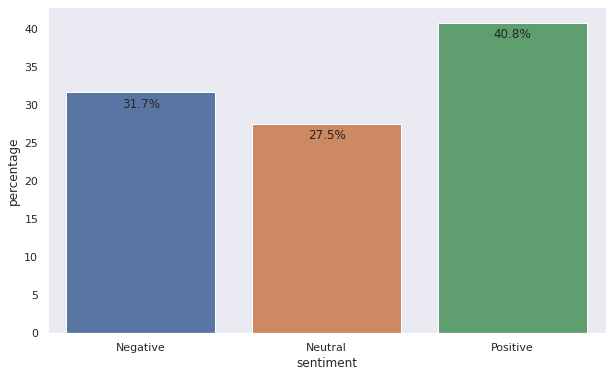

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="sentiment", y="percentage",
                 data=composite_sentiment_df)

# Display annotations
for p in ax.patches:
    ax.annotate(f"{round(p.get_height(),1)}%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')


In [ ]:
 composite_df = tweets_df[['text', 'composite_sentiment', 'location']]
 composite_df

,text,composite_sentiment,location
0,I'm not against #CovidVaccine but I do have co...,Negative,?ø?ÿ­
1,@DavQuinn @RTENewsAtOne In France 'all' (?) 75...,Negative,#Irlande #??ire #Ireland
2,Reminder for the vaccine event in #Miami tomo...,Neutral,"Miami, FL"
3,Anyone working on that vaccine for White men w...,Neutral,"Los Angeles, CA"
4,@justjigar @PMOIndia @narendramodi What??s th...,Neutral,"Mumbai, India"
...,...,...,...
29121,#Hungarian ???????§ Prime Minister Viktor #Orb...,Negative,"Brussels, Belgium"
29122,"128,500 U.S. Marines have been offered Covid-1...",Negative,"Texas, USA"
29123,So far Covid Vaccine Import Export share.. #va...,Negative,"My book is available on Amazon, Google books, ..."
29124,"1,400 individuals vaccinated so far ?? report...",Negative,Malta


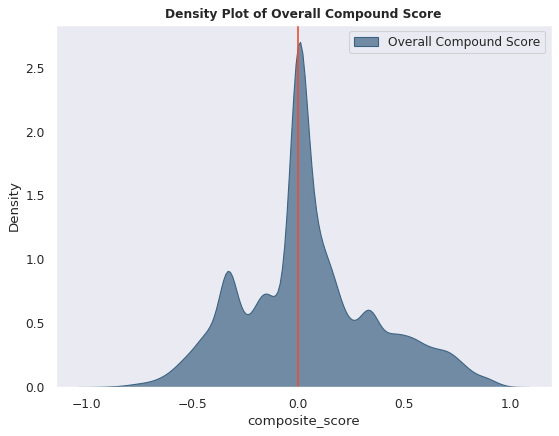

In [ ]:
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(tweets_df["composite_score"], shade=True, color="#3c6382", label="Overall Compound Score", alpha=.7)

# Decoration
plt.title('Density Plot of Overall Compound Score', fontsize=11, fontweight='bold')
plt.axvline(x=0, color='#e55039')
plt.legend()
plt.show()

In [ ]:
# BEFORE MERGING LOCATIONS

top_location_of_tweet = composite_df['location'].value_counts().head(15)
top_location_of_tweet.head(15)

India                             1074
New Delhi, India                   466
United States                      384
Beijing, China                     362
Mumbai, India                      333
London, England                    327
Beijing                            320
London                             216
New Delhi                          201
Los Angeles, CA                    185
United Kingdom                     177
New York, NY                       164
Mumbai                             159
Canada                             145
Toronto, Canada  and Worldwide     144
Name: location, dtype: int64

In [ ]:
#composite_df_copy = composite_df.copy()
composite_df['location'] = composite_df['location'].apply(lambda x: (x.split()[-1]).strip() if x.split() else None )
composite_df

,text,composite_sentiment,location
0,I'm not against #CovidVaccine but I do have co...,Negative,?ø?ÿ­
1,@DavQuinn @RTENewsAtOne In France 'all' (?) 75...,Negative,#Ireland
2,Reminder for the vaccine event in #Miami tomo...,Neutral,FL
3,Anyone working on that vaccine for White men w...,Neutral,CA
4,@justjigar @PMOIndia @narendramodi What??s th...,Neutral,India
...,...,...,...
29121,#Hungarian ???????§ Prime Minister Viktor #Orb...,Negative,Belgium
29122,"128,500 U.S. Marines have been offered Covid-1...",Negative,USA
29123,So far Covid Vaccine Import Export share.. #va...,Negative,Scribd...
29124,"1,400 individuals vaccinated so far ?? report...",Negative,Malta


In [ ]:
new_df = tweets_df[['text_cleaned', 'nltk_sentiment']]

In [ ]:
# remove short words
new_df['text_cleaned'] = new_df['text_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
# create new variable tokenized tweet 
tokenized_tweet = new_df['text_cleaned'].apply(lambda x: x.split())

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
new_df['text_cleaned']  = tokenized_tweet

In [ ]:
new_df["text_cleaned"] = new_df["text_cleaned"].str.lower()#.str.split()

### ** Extracting Features from Cleaned Tweets**

In [ ]:
new_df['nltk_sentiment'].value_counts()

Neutral     13706
Positive    10868
Negative     4552
Name: nltk_sentiment, dtype: int64

### **Removing Stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
new_df['text_cleaned'].apply(lambda x: [item for item in x if item not in stop])

0        [w, h, l, e,  , h, e,  , w, r, l,  , h,  , b, ...
1        [r, u, n,  , v, c, c, n,  , c, r, e,  , l,  , ...
2        [e,  , n, n,  , h, v, e,  , n,  , u, e,  , v, ...
3        [b,  ,  , c, l,  , h, e,  , f, e,  , f, r,  , ...
4               [e,  , w, l, l,  , r,  , g, e,  , n, ,,  ]
                               ...                        
29121    [r, u,  , p, u, n, k,  , v, c, c, n,  , h, p, ...
29122    [g,  , c, l, e, r, n, c,  , c, g, ., h, r,  , ...
29123    [r, .,  , n,  , b, e, c, u,  , u,  , b, u,  , ...
29124    [g, e, n, e, r,  , n, f, r,  , n,  , c, l, r, ...
29125    [f, r,  , h, e,  , g, n, r,  , u, h, e, n,  , ...
Name: text_cleaned, Length: 29126, dtype: object

In [ ]:

new_df.head(5)


,text_cleaned,nltk_sentiment
0,while the world ha been the wrong side histori...,Negative
1,russian vaccin creat last year,Positive
2,doe anyon have ani use adviceguid for whether ...,Positive
3,bit sad claim the fame for success patriot com...,Positive
4,"state will start get monday, say",Neutral


In [ ]:
new_df.shape

(29126, 2)

In [ ]:
new_df.isnull().sum()


text_cleaned      0
nltk_sentiment    0
dtype: int64

### **Spitting Our Dataset into Training And Testing Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.nltk_sentiment) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (23300, 2)
valid shape :  (5826, 2)


### **Use Of Counter Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.text_cleaned)
X_valid = vectorizer.transform(valid.text_cleaned)

y_train = train.nltk_sentiment
y_valid = valid.nltk_sentiment

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (23300, 14015)
X_train.shape :  (5826, 14015)
y_train.shape :  (23300,)
y_valid.shape :  (5826,)


### **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.853304721030043
Validation accuracy Score :  0.7864744249914177
              precision    recall  f1-score   support

    Negative       0.49      0.73      0.58       602
     Neutral       0.85      0.82      0.83      2832
    Positive       0.84      0.76      0.80      2392

    accuracy                           0.79      5826
   macro avg       0.72      0.77      0.74      5826
weighted avg       0.81      0.79      0.79      5826



### **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.999656652360515
Validation accuracy Score :  0.8420871953312736
              precision    recall  f1-score   support

    Negative       0.53      0.84      0.65       577
     Neutral       0.94      0.83      0.88      3119
    Positive       0.85      0.87      0.86      2130

    accuracy                           0.84      5826
   macro avg       0.77      0.84      0.80      5826
weighted avg       0.87      0.84      0.85      5826



### **Support vector machine**

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9475965665236051
Validation accuracy Score :  0.8242361826295915
              precision    recall  f1-score   support

    Negative       0.49      0.82      0.61       543
     Neutral       0.94      0.79      0.86      3249
    Positive       0.82      0.88      0.85      2034

    accuracy                           0.82      5826
   macro avg       0.75      0.83      0.77      5826
weighted avg       0.86      0.82      0.83      5826



### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9332188841201716
Validation accuracy Score :  0.8583934088568486
              precision    recall  f1-score   support

    Negative       0.61      0.81      0.69       682
     Neutral       0.93      0.85      0.89      3009
    Positive       0.87      0.89      0.88      2135

    accuracy                           0.86      5826
   macro avg       0.80      0.85      0.82      5826
weighted avg       0.87      0.86      0.86      5826



### **All the multiclass models test accuracy in descending order**

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.851772
2,Random Forest,0.838469
0,Support Vector Machines,0.807913
3,Naive Bayes,0.787314


### **Winner Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9332188841201716
Validation accuracy Score :  0.8583934088568486
              precision    recall  f1-score   support

    Negative       0.61      0.81      0.69       682
     Neutral       0.93      0.85      0.89      3009
    Positive       0.87      0.89      0.88      2135

    accuracy                           0.86      5826
   macro avg       0.80      0.85      0.82      5826
weighted avg       0.87      0.86      0.86      5826



### **Confusion matrix**

In [ ]:
# Get the predicted classes
train_class_preds = logreg.predict(X_train)
test_class_preds = logreg.predict(X_valid)

[[ 2987   374   281]
 [   94 10561   309]
 [  125   373  8196]]


[Text(0, 0.5, 'Neutral'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Positive')]

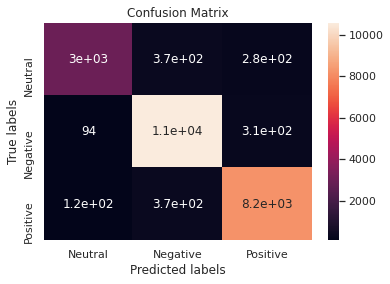

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Neutral', 'Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **VISUALIZATION**

In [ ]:
# AFTER MERGING LOCATIONS

top_location_of_tweet = nltk_df['location'].value_counts()
top_location_of_tweet.head(20)

India          3258
USA            1458
England         894
CA              690
States          511
China           509
UK              454
NY              418
Canada          400
TX              398
Delhi           397
Kingdom         361
Beijing         322
London          314
Pakistan        306
FL              255
Russia          219
Philippines     218
Ireland         198
Worldwide       195
Name: location, dtype: int64

In [ ]:
import plotly.graph_objects as go

# Sentiments pie-chart ( world )

In [ ]:
# positive df
pos_dt = nltk_df[nltk_df.nltk_sentiment == 'Positive']
pos_dt.value_counts()
#pos_dt


text_cleaned                                                                                                  nltk_sentiment  location
announces capacity expansion to support vaccination campaigns in India and worldwide                          Positive        India       2
RDIF and Panacea Biotec agree to produce million doses of vaccine in India per year.                          Positive        India       2
Panel grants emergency-use approval to Russia-made Covid vaccine (reports )                                   Positive        India       2
Happy to say I got my first shot of the vaccine today!!!                                                      Positive        NJ          1
Has Russia vaccine been approved by  What's it's efficacy for Kenyans.                                        Positive        Kenya       1
                                                                                                                                         ..
Some side effects of stay

In [ ]:
# returns the number of occurences of each location.
loc_analysis = pd.DataFrame(pos_dt['location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'location':'count'})
#loc_analysis

#Visualizing the pie chart for top 12 countries with most positive tweets.
# in this df, all tweets are positive only, so now we only have to find top countries in this list.

data = {
   "values": loc_analysis['count'][:5],
   "labels": loc_analysis.index[:5],
   "domain": {"column": 0},
   "name": "Location",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of Locations with Most Positive Tweets</b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
# negative df
neg_dt = nltk_df[nltk_df.nltk_sentiment == 'Negative']
neg_dt.value_counts()
#neg_dt


text_cleaned                                                                                                        nltk_sentiment  location              
~21 hours after Dose and I have a F fever, cutaneous hyperesthesia,  restless fatig                                 Negative        USA                       1
I Refuse to take your vaccine.                                                                                      Negative        States                    1
How will they be selecting these children Will parents be paid This is SICK! Experimental Vaccine                   Negative        Africa                    1
However, even residents of poorer countries, who, after a pause, again began to vaccinate with "", have             Negative        city                      1
Human Rights Watch claim that Iranian authorities' ban on Covid-19 vaccines made in the UK, France and the U.S. is  Negative        UK                        1
                                             

In [ ]:
# returns the number of occurences of each location.
loc_analysis = pd.DataFrame(neg_dt['location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'location':'count'})
#loc_analysis

#Visualizing the pie chart for top 12 countries with most negative tweets.
# in this df, all tweets are negative only, so now we only have to find top countries in this list.

data = {
   "values": loc_analysis['count'][:5],
   "labels": loc_analysis.index[:5],
   "domain": {"column": 0},
   "name": "Location",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio of Locations with Most Negative Tweets</b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


# Sentiments ( country-wise)

In [ ]:
#PIE chart of tweets in India

# positive df 
pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & (composite_df.location == 'India')].axes[0])

# negative df
neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & (composite_df.location == 'India')].axes[0])

# neutral df
neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & (composite_df.location == 'India')].axes[0])

In [ ]:
pos_len

1229

In [ ]:
data = {
   "values": [pos_len, neg_len, neu_len],
   "labels": ['Positive', 'Negative', 'Neutral'],
   "domain": {"column": 0},
   "name": "India",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
    "marker": {'colors': ['#9ACD32', '#ff0000', '#e6f2ff']}

}
layout = go.Layout(title="<b>Ratio of Tweets in India </b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
#PIE chart of tweets in USA

# positive df 
pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & (composite_df.location == 'USA')].axes[0])

# negative df
neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & (composite_df.location == 'USA')].axes[0])

# neutral df
neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & (composite_df.location == 'USA')].axes[0])

data = {
   "values": [pos_len, neg_len, neu_len],
   "labels": ['Positive', 'Negative', 'Neutral'],
   "domain": {"column": 0},
   "name": "USA",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
    "marker": {'colors': ['#9ACD32', '#ff0000', '#e6f2ff']}

}
layout = go.Layout(title="<b>Ratio of Tweets in USA </b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
#PIE chart of tweets in Canada

# positive df 
pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & ((composite_df.location == 'Canada') | (composite_df.location == 'CA'))].axes[0])

# negative df
neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & ((composite_df.location == 'Canada') | (composite_df.location == 'CA'))].axes[0])

# neutral df
neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & ((composite_df.location == 'Canada') | (composite_df.location == 'CA'))].axes[0])

data = {
   "values": [pos_len, neg_len, neu_len],
   "labels": ['Positive', 'Negative', 'Neutral'],
   "domain": {"column": 0},
   "name": "Canada",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
    "marker": {'colors': ['#9ACD32', '#ff0000', '#e6f2ff']}

}
layout = go.Layout(title="<b>Ratio of Tweets in Canada </b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
#PIE chart of tweets in UK

# positive df 
pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & (composite_df.location == 'UK')].axes[0])

# negative df
neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & (composite_df.location == 'UK')].axes[0])

# neutral df
neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & (composite_df.location == 'UK')].axes[0])

data = {
   "values": [pos_len, neg_len, neu_len],
   "labels": ['Positive', 'Negative', 'Neutral'],
   "domain": {"column": 0},
   "name": "UK",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
    "marker": {'colors': ['#9ACD32', '#ff0000', '#e6f2ff']}

}
layout = go.Layout(title="<b>Ratio of Tweets in UK </b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


In [ ]:
#PIE chart of tweets in Australia

# positive df 
pos_len = len(composite_df[(composite_df.composite_sentiment == 'Positive') & (composite_df.location == 'Australia')].axes[0])

# negative df
neu_len = len(composite_df[(composite_df.composite_sentiment == 'Neutral') & (composite_df.location == 'Australia')].axes[0])

# neutral df
neg_len = len(composite_df[(composite_df.composite_sentiment == 'Negative') & (composite_df.location == 'Australia')].axes[0])

data = {
   "values": [pos_len, neg_len, neu_len],
   "labels": ['Positive', 'Negative', 'Neutral'],
   "domain": {"column": 0},
   "name": "Australia",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie",
    "marker": {'colors': ['#9ACD32', '#ff0000', '#e6f2ff']}

}
layout = go.Layout(title="<b>Ratio of Tweets in Australia </b><br>", legend=dict(x=0.07, y=1.1))  #, orientation="h"

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()


#**Wordcloud** 
1. get the 10 most commonly appearing words.
2. create a wordcloud for the same.

In [ ]:
stop_words = stopwords.words('english')
not_stopwords = {}
common_words =['com','twitter','please', 'give', 'say', 'still', 'via', 'COVID-19', 'vaccine', 'Vaccine', 'Covid-19', 'new',
               'the','would','could','can','may','must', 'The', 'one', 'take', 'getting', 'doses', 'coronavirus', 'many'
               ]
stop_words.extend(word for word in common_words if word not in stop_words)
final_stop_words = set([word for word in stop_words if word not in not_stopwords])
new_df.text_cleaned = new_df.text_cleaned.apply(lambda x: ' '.join([word for word in x.split() if word not in final_stop_words]))

In [ ]:
# normal_words = ''.join([text for text in composite_df['text'][composite_df['composite_sentiment'] == 'Positive']])
# normal_words

#HT_Positive = extract_hashtags(composite_df['text'][composite_df['composite_sentiment'] == 'Positive'])
#HT_Positive = sum(HT_Positive, [text, sentiment])

from collections import Counter
pos_words = ''.join([text for text in new_df['text_cleaned']])
split_it = pos_words.split()
Counter = Counter(split_it)

most_occur = Counter.most_common(10)
most_occur

[('first', 2676),
 ('dose', 2238),
 ('vaccines', 1684),
 ('get', 1340),
 ('got', 1240),
 ('second', 1141),
 ('vaccination', 1027),
 ('shot', 987),
 ('vaccinated', 872),
 ('received', 748)]

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
STOPWORDS.update(['india', 'friends', '2wks', '8c', 'ph3', 'vaccines','citizens', 'states', 'false', 'day', 'data', 'vck', 'absence', 'opposition', 'wants', 'safet', 'distributed', 'bharat', 'ignore', 'biotech', 'bharatbiotech', 'government', 'taken', 'covid', 'amp', 'take', 'vaccine', 'hammering', 'yet', 'european', 
                  'ji', 'decade', 'covaxin', 'sh', 'eg', 'prev', 'paying', 'voice', 'govt', 'lot', 'taking', 'given', 'less', 'long', 'one', 'days', 'new', 'today',
                  'tweet', 'us', 'takeaway', 'must', 'many', 'add', 'will', 'without', 'known', 'speaking', 'even', 'little', 'none', 'people', 'made', 'common', 'got', 'back',
                  'india', 'friends', 'taken', 'covid', 'based', 'take', 'S', 'example', 'lik', 'modi', 'phase', 'covidvaccine', 'covid19india', 'show', 'well', 'now', 'already',
                  't', 'decade', 'covishield', 'sh', 'rs', 'astra', 'zeneca', 'oxford', 'countries', 'pe', 'rt', 'covid19vaccine', 'took', 'two', 'look', 'ye', 've', 'make', 'giving', 're',
                 'indian', 'sii', 'mean', 'know', 'example link', 'hand', 'chest', 'set', 'bharat biotech', 'COVID-19', 'vaccine', 'Vaccine', 'vaccination', 'covid19', 'Covid-19'])

(-0.5, 999.5, 599.5, -0.5)

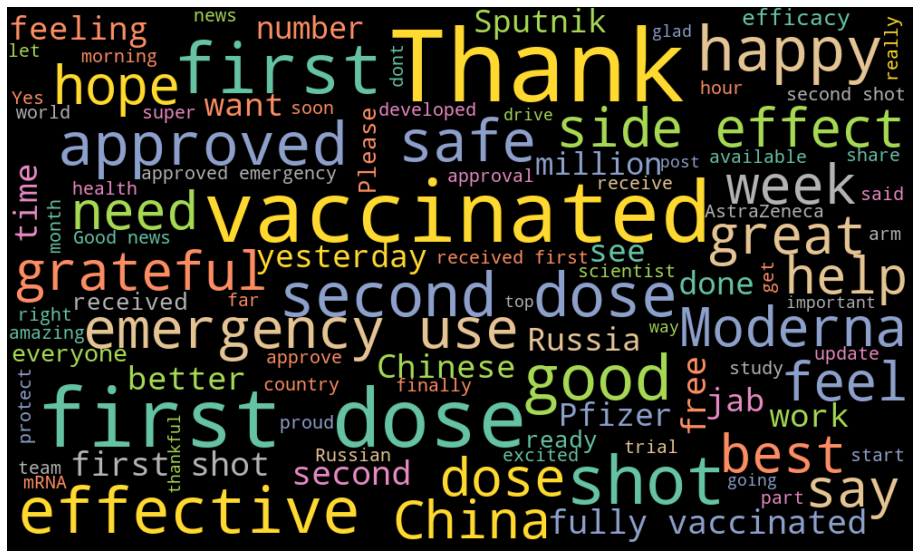

In [ ]:
normal_words = ' '.join([text for text in new_df['text_cleaned'][new_df['nltk_sentiment'] == 'Positive']])

wordCloud = WordCloud(max_words = 100, width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(normal_words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

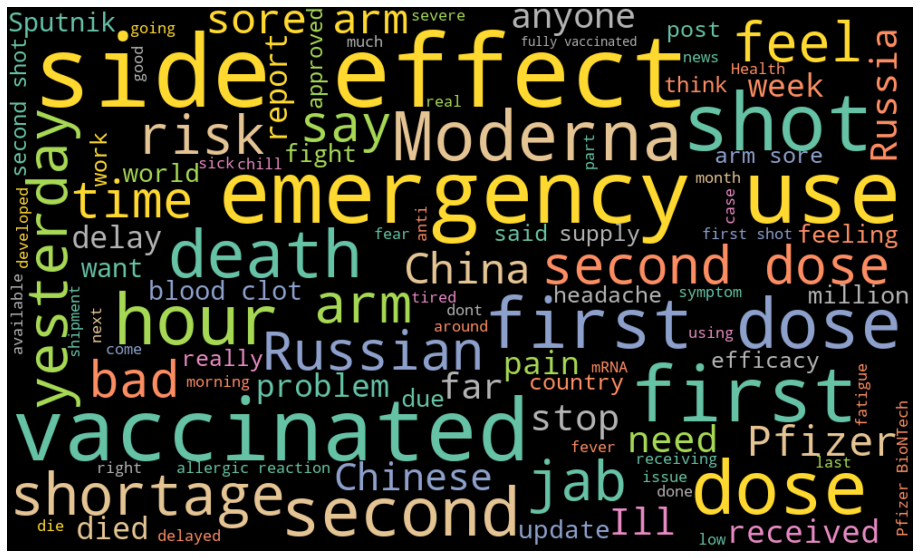

In [ ]:

normal_words = ' '.join([text for text in new_df['text_cleaned'][new_df['nltk_sentiment'] == 'Negative']])

wordCloud = WordCloud(max_words = 100,width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(normal_words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

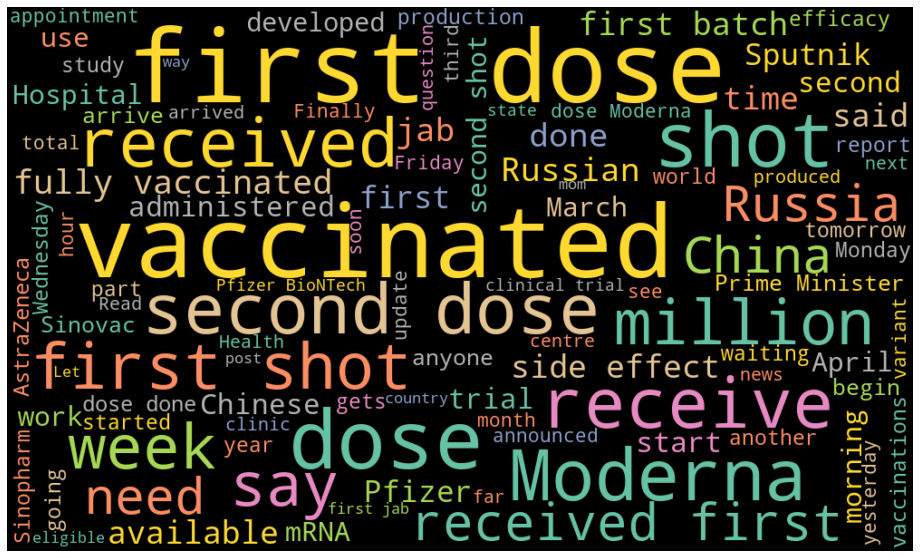

In [ ]:
normal_words = ' '.join([text for text in new_df['text_cleaned'][new_df['nltk_sentiment'] == 'Neutral']])
wordCloud = WordCloud(max_words = 100, width=1000, height=600, random_state=42, background_color='black', 
                      colormap='Set2', max_font_size=110, stopwords=STOPWORDS).generate(normal_words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')

### **Covishield and Covaxin**

### **Filter by Vaccy**

In [ ]:
all_vax = ['covaxin', 'covishield']

# Function to filter the data to a single vaccine
def filter_by_vaccy(df, vax):
    df_filt = pd.DataFrame()
    for v in vax:
        df_filt = df_filt.append(tweets_df[tweets_df['text'].str.lower().str.contains(v)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['text'].str.lower().str.contains(o)]
#     df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['tweet_date']).agg(np.nanmean).reset_index()

    timeline = timeline[['tweet_date']]
    return df_filt, timeline

In [ ]:
covaxin_df, covaxin_timeline = filter_by_vaccy(tweets_df, ['covaxin'])

In [ ]:
covishield_df, covishield_timeline = filter_by_vaccy(tweets_df, ['covishield'])


In [ ]:
!pip install langdetect 
from langdetect import detect

In [ ]:
# #Extracting only the tweet column from the dfs

# covishield_df = covishield_df['text']
# covishield_df = covishield_df.to_frame().reset_index()
# del covishield_df['index']

# covaxin_df = covaxin_df['text']
# covaxin_df = covaxin_df.to_frame().reset_index()
# del covaxin_df['index']

In [ ]:
def cleanTweets(text):
    
    if text == '' or text=='...' or text== None:
        return 'None'
    try:
        lang = detect(text)
        if lang !='en':
            return 'None'
    except Exception as e:
        print(e)
        print(text)
        return 'None'
    
    # Convert to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    # Remove retweets:
    text = re.sub(r'RT : ', '', text)
    # Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    # Removing extra spaces from start and end
    text = re.sub(r"^\s+", "", text)
    
    return text
  
covishield_df['text'] = covishield_df['text'].apply(cleanTweets)
covaxin_df['text'] = covaxin_df['text'].apply(cleanTweets)

In [ ]:
# Define function to get value counts
def get_value_counts_covi(col_name, analyzer_name):
    count = pd.DataFrame(covishield_df[col_name].value_counts())
    percentage = pd.DataFrame(covishield_df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [ ]:
# Define function to get value counts
def get_value_counts_cov(col_name, analyzer_name):
    count = pd.DataFrame(covaxin_df[col_name].value_counts())
    percentage = pd.DataFrame(covaxin_df[col_name].value_counts(normalize=True).mul(100))
    value_counts_df = pd.concat([count, percentage], axis = 1)
    value_counts_df = value_counts_df.reset_index()
    value_counts_df.columns = ['sentiment', 'counts', 'percentage']
    value_counts_df.sort_values('sentiment', inplace = True)
    value_counts_df['percentage'] = value_counts_df['percentage'].apply(lambda x: round(x,2))
    value_counts_df = value_counts_df.reset_index(drop = True)
    value_counts_df['analyzer'] = analyzer_name
    return value_counts_df

In [ ]:
sia = SentimentIntensityAnalyzer()

# Obtaining NLTK scores
covishield_df['nltk_scores'] = covishield_df['text'].apply(lambda x: sia.polarity_scores(x))
covaxin_df['nltk_scores'] = covaxin_df['text'].apply(lambda x: sia.polarity_scores(x))


# Obtaining NLTK compound score
covishield_df['nltk_cmp_score'] = covishield_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])
covaxin_df['nltk_cmp_score'] = covaxin_df['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
neutral_thresh = 0.05

In [ ]:
# Categorize scores into the sentiments of positive, neutral or negative
covishield_df['nltk_sentiment'] = covishield_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))
covaxin_df['nltk_sentiment'] = covaxin_df['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [ ]:
covishield_df['nltk_cmp_score'].describe()

count    154.000000
mean       0.141769
std        0.307024
min       -0.696600
25%        0.000000
50%        0.000000
75%        0.352700
max        0.864500
Name: nltk_cmp_score, dtype: float64

In [ ]:
covaxin_df['nltk_cmp_score'].describe()

count    2156.000000
mean        0.137204
std         0.347028
min        -0.891000
25%         0.000000
50%         0.000000
75%         0.440400
max         0.954900
Name: nltk_cmp_score, dtype: float64

In [ ]:
covishield_df = get_value_counts_covi('nltk_sentiment','NLTK Vader')
covishield_df

,sentiment,counts,percentage,analyzer
0,Negative,12,7.79,NLTK Vader
1,Neutral,84,54.55,NLTK Vader
2,Positive,58,37.66,NLTK Vader


In [ ]:
covaxin_df = get_value_counts_cov('nltk_sentiment','NLTK Vader')
covaxin_df

,sentiment,counts,percentage,analyzer
0,Negative,269,12.48,NLTK Vader
1,Neutral,1111,51.53,NLTK Vader
2,Positive,776,35.99,NLTK Vader


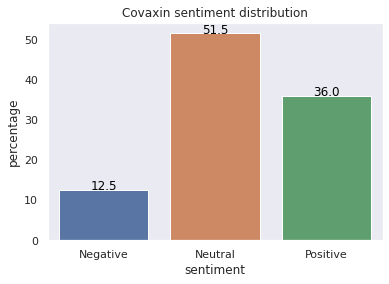

In [ ]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=covaxin_df)
ax.set_title('Covaxin sentiment distribution')

for index, row in covaxin_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")

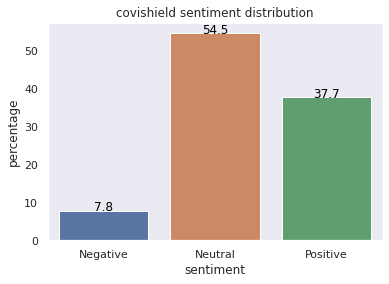

In [ ]:
sns.set_theme(style="dark")
ax = sns.barplot(x="sentiment", y="percentage", data=covishield_df)
ax.set_title('covishield sentiment distribution')

for index, row in covishield_df.iterrows():
    ax.text(row.name,row.percentage, round(row.percentage,1), color='black', ha="center")